# Регрессионный анализ с одной независимой переменной

### Связь бедности и количества людей имеющих среднее образование в штатах Америки

В качестве зависимой переменной выступает число людей за "чертой" бедности в штате(%), независимая - количество людей с средним образованием(%)

Нулевая гипотеза: взаимосвязи между этими переменными нет (b1=0)

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sma

In [11]:
URL = 'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv'
data = pd.read_csv(URL)

In [12]:
data

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6
5,Colorado,84.5,90.2,88.7,9.4,9.6
6,Connecticut,87.7,85.4,87.5,7.8,12.1
7,Delaware,80.1,76.3,88.7,8.1,13.1
8,District of Columbia,100.0,36.2,86.0,16.8,18.9
9,Florida,89.3,80.6,84.7,12.1,12.0


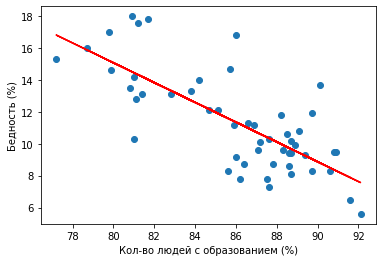

         hs_grad    poverty
count  51.000000  51.000000
mean   86.011765  11.349020
std     3.725998   3.099185
min    77.200000   5.600000
25%    83.300000   9.250000
50%    86.900000  10.600000
75%    88.700000  13.400000
max    92.100000  18.000000


In [31]:
plt.scatter(data['hs_grad'], data['poverty'])
plt.xlabel('Кол-во людей с образованием (%)')
plt.ylabel('Бедность (%)')

x = data['hs_grad']
y = data['poverty']
b1, b0 = np.polyfit(x, y, 1)
plt.plot(x, b0 + b1*x, color='red')
plt.show()

dt1 = data[['hs_grad', 'poverty']]
print(dt1.describe())

In [112]:
r = np.corrcoef(x, y)
print("Коэффициент корреляции: ", r[1][0])
print("Коэффициент детерминации: ", r[1][0]**2)

Коэффициент корреляции:  -0.7468582531582505
Коэффициент детерминации:  0.5577972503105934


In [161]:
df = len(x)-2
residuals = y-(b0+b1*x)

ssr = (sum(residuals**2))**0.5/df**0.5
sb1 = ssr/(len(x)**0.5*x.std())
sb0 = ssr*x.mean()/(len(x)**0.5*x.std())

tb1 = b1/sb1
tb0 = b0/sb0

p_b0 = stats.t.sf(np.abs(tb0), df)
p_b1 = stats.t.sf(np.abs(tb1), df)

results = {'Estimate':[b0, b1],
          'Std.Error':[sb0,sb1],
          't-value':[tb0,tb1],
          'Pr(>|t|)':[p_b0,p_b1]}
pd.DataFrame(results, columns=['Estimate', 'Std.Error', 't-value', 'Pr(>|t|)'], index=['B0 (intersept)', 'B1 (slope)'])

,Estimate,Std.Error,t-value,Pr(>|t|)
B0 (intersept),64.780966,6.729385,9.626580,3.505793e-13
B1 (slope),-0.621217,0.078238,-7.940093,1.179655e-10


Уровень значимости меньше 0.05, т.е. обнаружили статистически значимую взаимосвязь между двумя переменными. Следовательно, отклоняем нулевую гипотезу.

Мы ожидаем, что при увеличении 1-го процента количества людей имеющих среднее образование, количество людей проживающие за чертой бедности будет уменьшаться на 0.62%.

56% изменчивости зависимой переменной объясняется нашей моделью (по коэф. детерминации)

### Анализ остатков

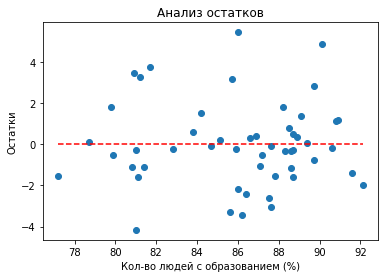

In [205]:
plt.scatter(x,residuals)
plt.plot(x1,[0]*len(x1),'--r')
plt.xlabel('Кол-во людей с образованием (%)')
plt.ylabel('Остатки')
plt.title('Анализ остатков')
plt.show()

C:\Users\qw585\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


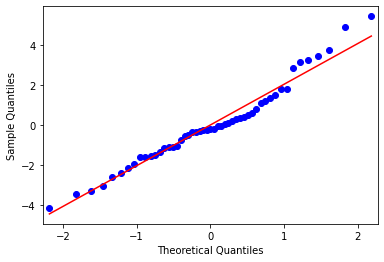

In [206]:
qqplot = sma.qqplot(residuals,marker='o', line='s', a = 0.25)

В целом требования гомоскедастичности и нормальности распределения остатков выполнено (хотя и присутствуют заметные положительные отклонения от нуля)

### Предсказания значений

In [209]:
def f(x):
    return b0 + b1*x

In [212]:
f(62) #уровень бедности в %, если у 62% людей есть среднее образование

26.265529266873436